In [1]:
#Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Reading the Dataset

In [4]:
df=pd.read_csv(r"/Users/adithkumar/Desktop/DS/Assignment/Neural networks/Alphabets_data.csv")
df

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [5]:
#Checking for the null valuess
df.isnull().sum()


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
#Checking for the duplicated values
df.duplicated().sum()


1332

In [7]:
#dropping the duplicated to remove the bias
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

xbox          ybox         width        height         onpix  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       4.150793      7.244322      5.279891      5.506910      3.660596   
std        1.879428      3.187660      1.934960      2.178292      2.160555   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      5.000000      4.000000      4.000000      2.000000   
50%        4.000000      8.000000      5.000000      6.000000      3.000000   
75%        5.000000     10.000000      6.000000      7.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.919381      7.529409      4.584637      5.201361      8.353171   
std        2.032226      2.319834      2.625714      2.320102      2.468905   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             x2ybar        xy2bar         xedge        xedgey         yedge  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.452700      7.924577      3.131455      8.351832      3.796872   
std        2.624673      2.106957      2.323901      1.574853      2.540271   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      7.000000      2.000000      8.000000      2.000000   
50%        6.000000      8.000000      3.000000      8.000000      4.000000   
75%        8.000000      9.000000      4.000000      9.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             yedgex  
count  18668.000000  
mean       7.784390  
std        1.657358  
min        0.000000  
25%        7.000000  
50%        8.000000  
75%        9.000000  
max       15.000000

<Axes: xlabel='letter', ylabel='count'>

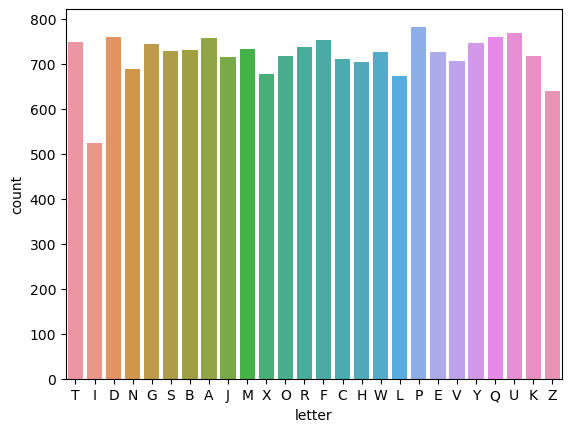

In [9]:
#Checking the distribution of target classes
sns.countplot(x="letter",data=df)

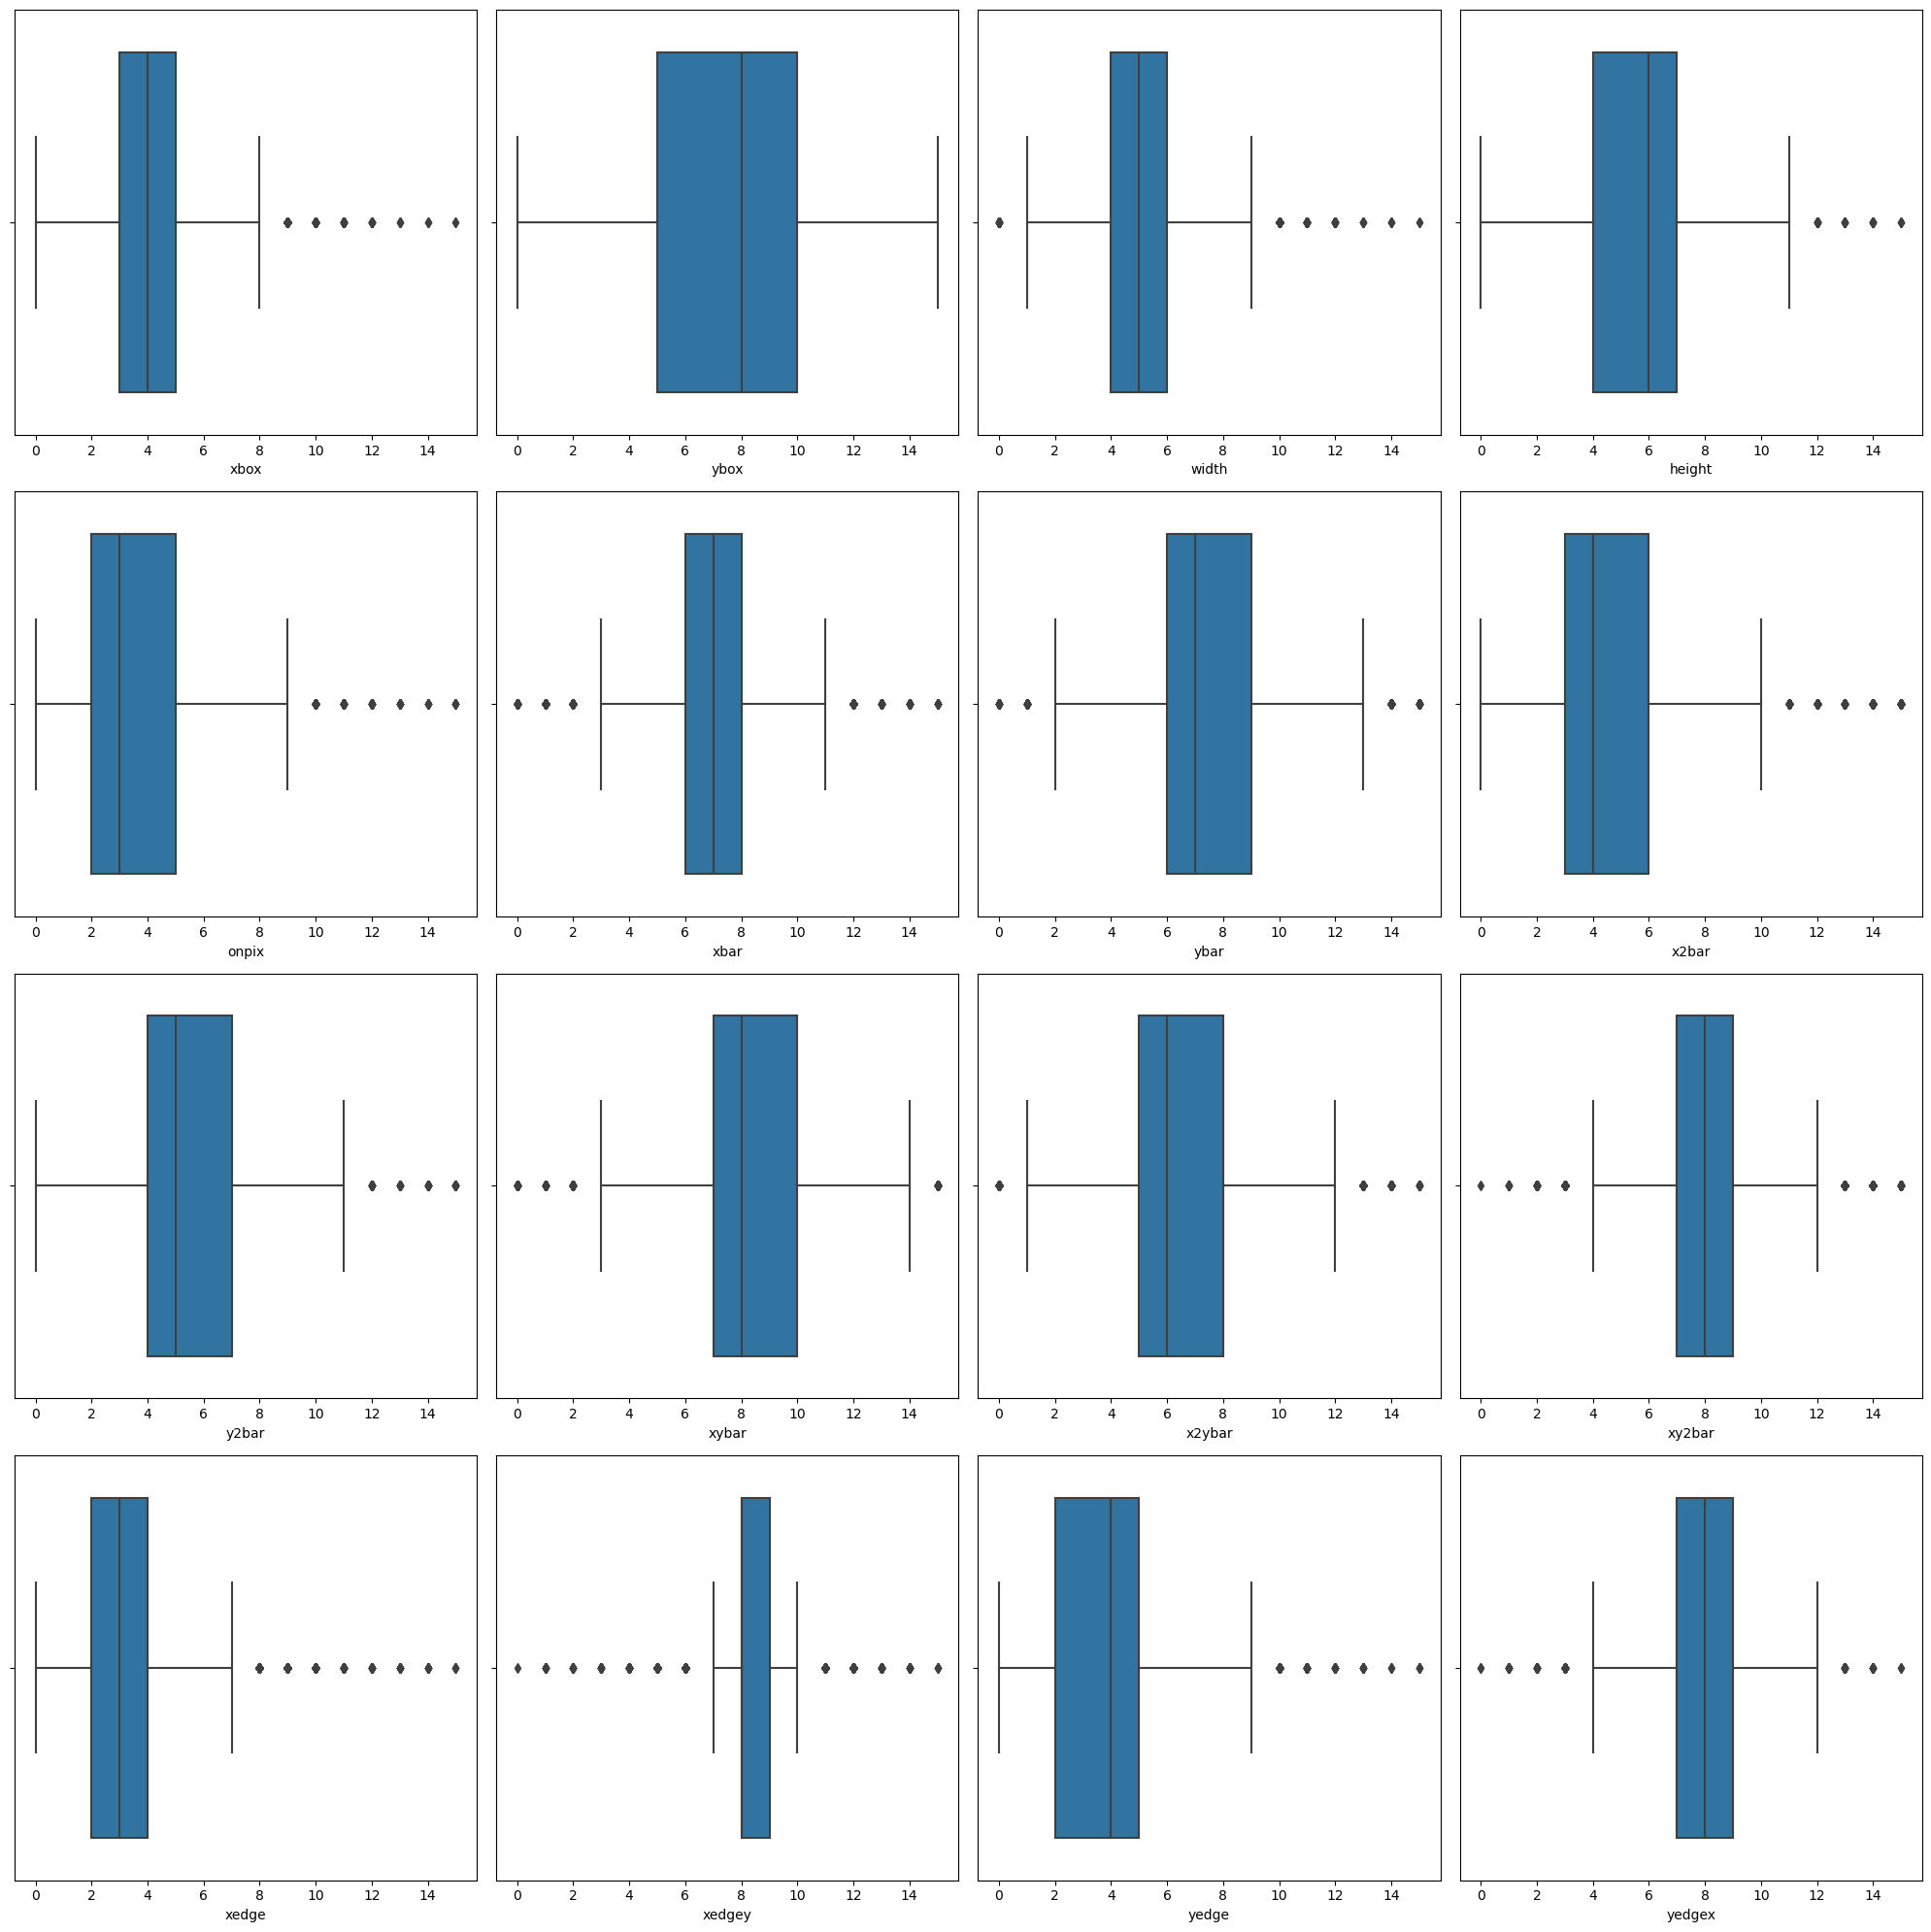

In [10]:
#Plotting boxplots to check the distribution of numercial columns
cols=df.columns[1:].tolist()
fig,ax=plt.subplots(4,4,figsize=(20,20))
r=c=0
for col in cols:
    sns.boxplot(x=col,data=df,ax=ax[r,c])
    c+=1
    if c==4:
        r+=1
        c=0
plt.tight_layout()
plt.show()

/Users/adithkumar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


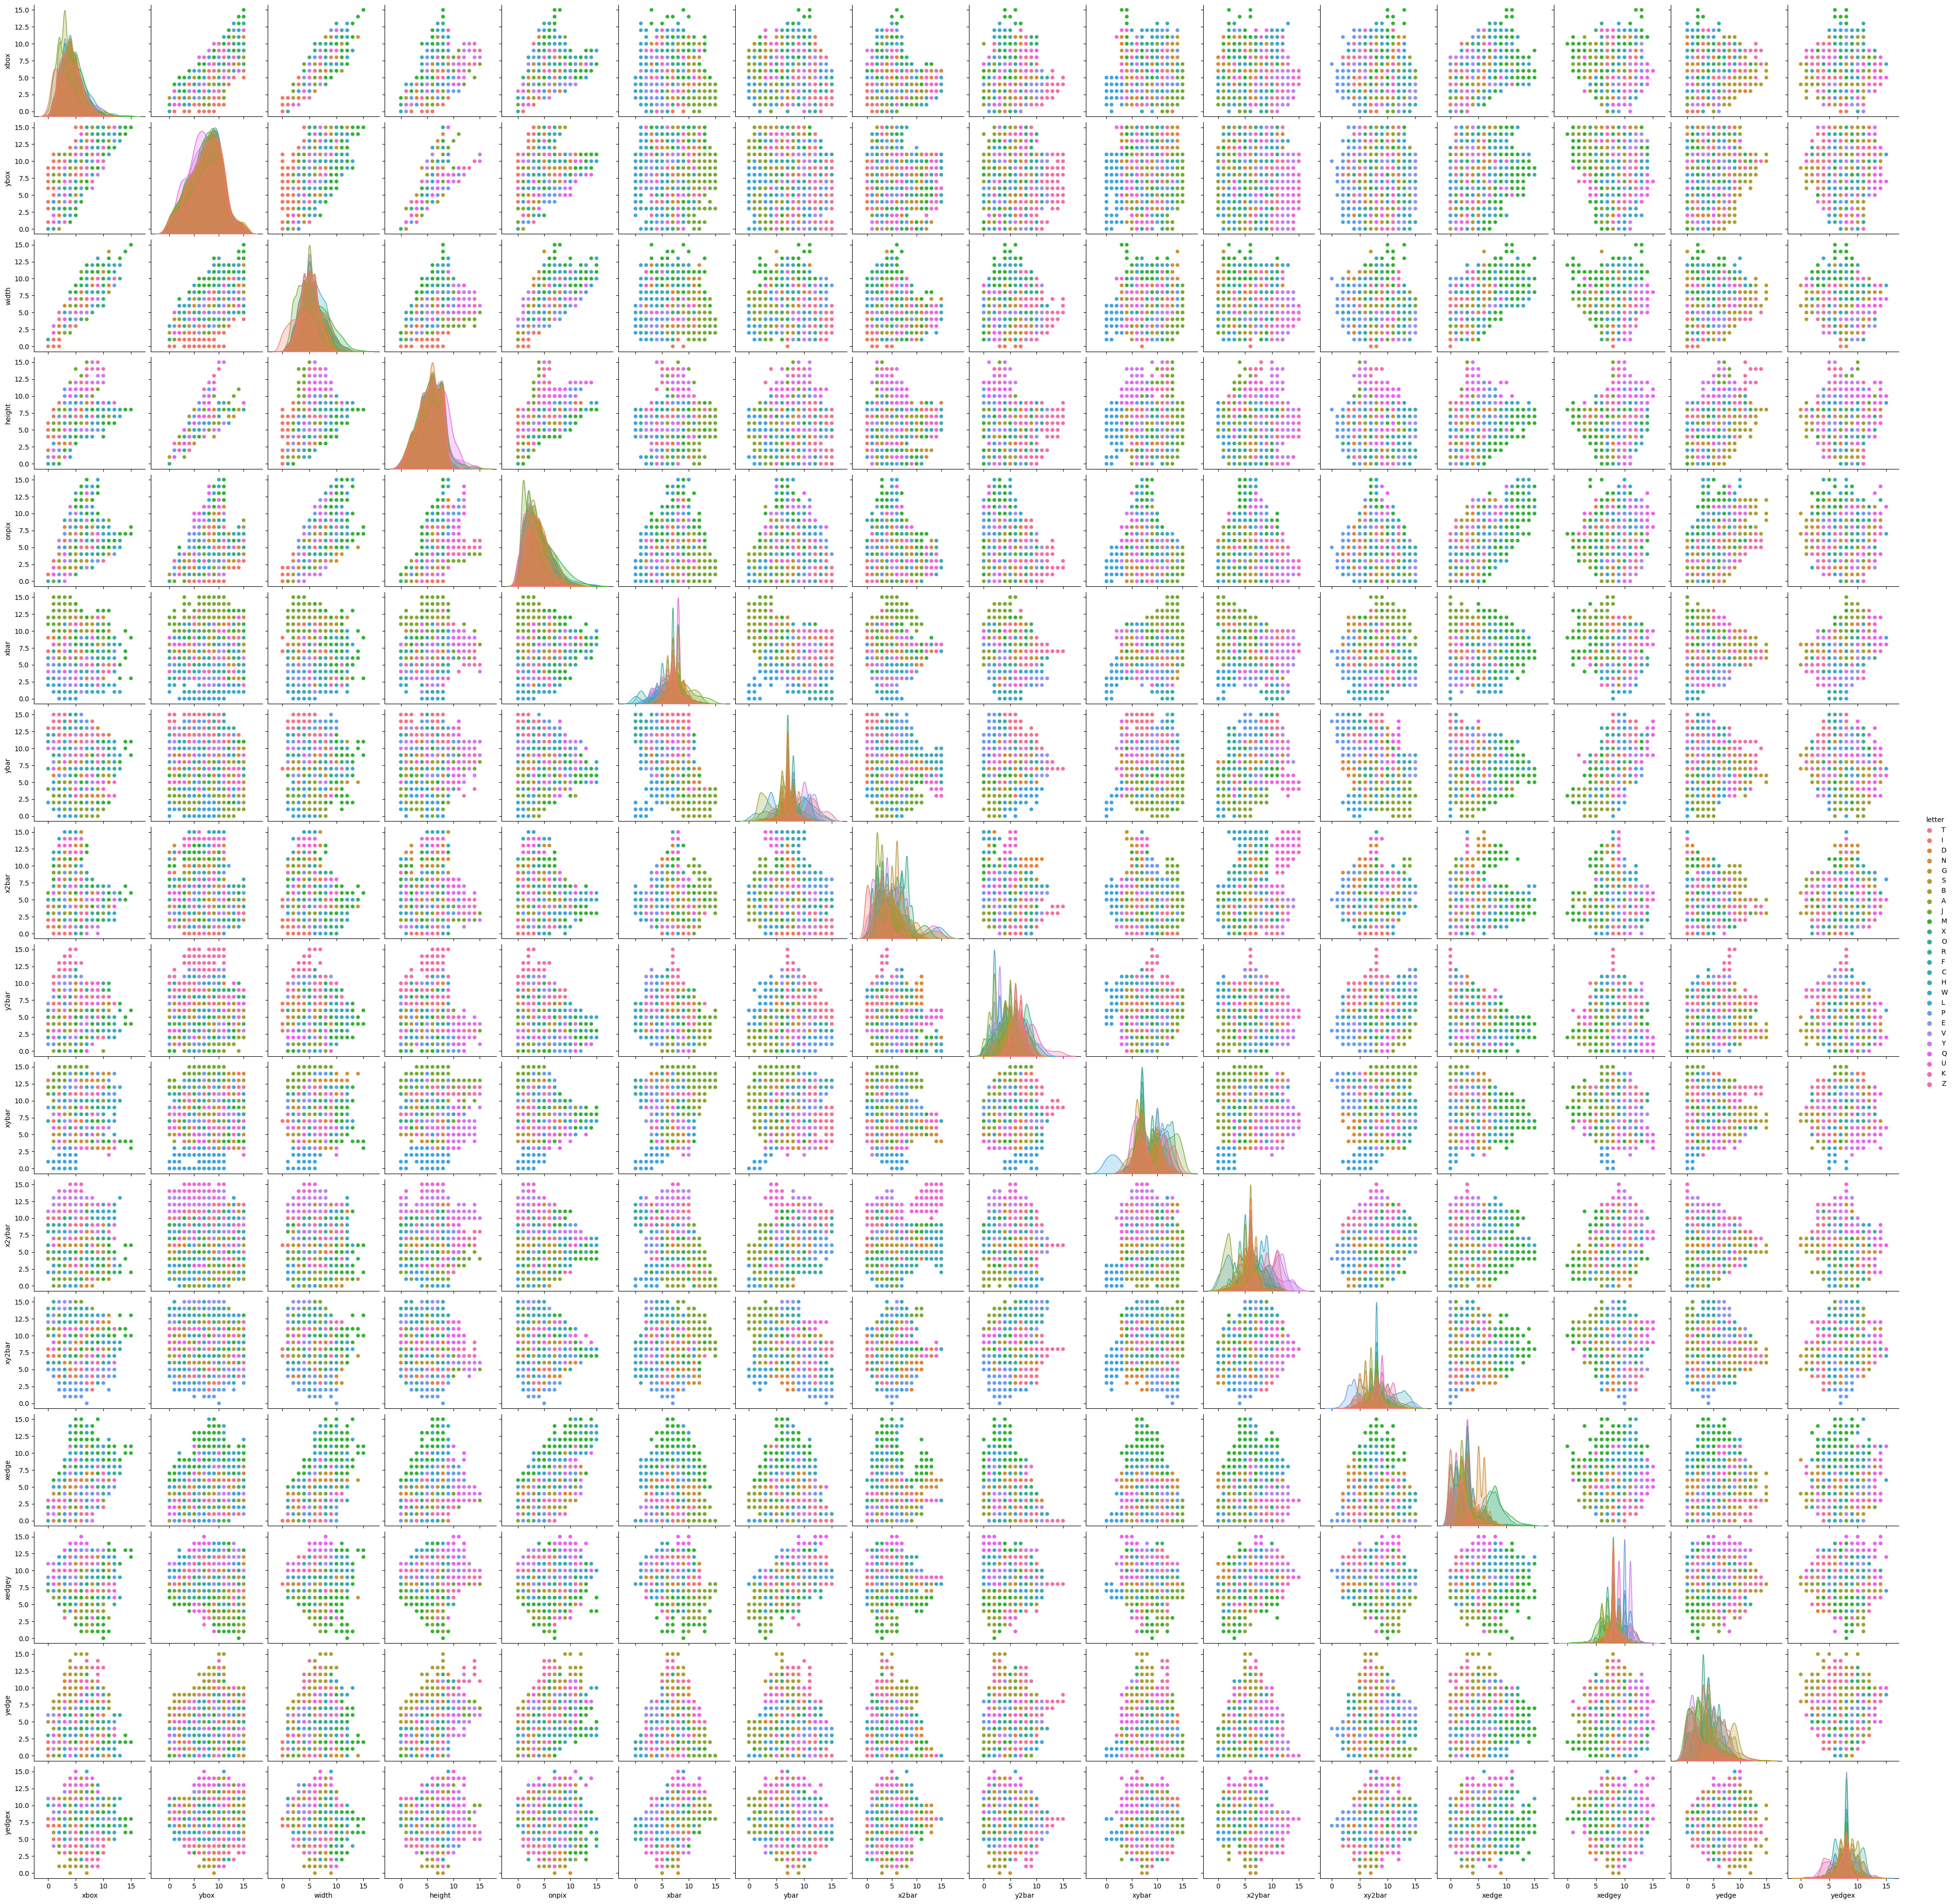

In [11]:
# Visualizing numerical columns clustered based on species
sns.pairplot(df,hue='letter')

In [12]:
#Train test Split
X=df.drop('letter',axis=1).values
y=pd.get_dummies(df['letter']).values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)


In [14]:
#performing min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/adithkumar/anaconda3/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [23]:
import keras
import tensorflow
import scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

ImportError: cannot import name '_get_container_adapter' from 'sklearn.utils._set_output' (/Users/adithkumar/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py)

In [ ]:
#input shape
X_train_scaled.shape[1:]


In [ ]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  ''' 
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer having 3 neurons, 1 per class
  model.add(Dense(3,activation='softmax'))
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
  return model

In [ ]:
# Applying KerasClassifier Wrapper to neural network
keras_cls = KerasClassifier(build_model)

In [26]:
from tensorflow.S import KerasClassifier

SyntaxError: invalid syntax (4223953996.py, line 1)

In [20]:
#!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/ea/09/1c02aa24daf7a003c06f629fbb69dc9ae1bda1b247d7b8981e550d752ac9/scikeras-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.4.2 from https://files.pythonhosted.org/packages/6c/97/dfc635bd435655c1216756b543e0427579df144914a055a188d3c0ffd52f/scikit_learn-1.5.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 6.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-le

In [ ]:
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import Kera